In [12]:
import pandas as pd
import nltk
from nltk.tokenize import word_tokenize,sent_tokenize
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer
from nltk import pos_tag
nltk.download('punkt')
nltk.download('averaged_perception_tagger')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\DELL\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Error loading averaged_perception_tagger: Package
[nltk_data]     'averaged_perception_tagger' not found in index
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\DELL\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [33]:
#load the dataset
df=pd.read_csv("reviews.csv")
def process_review(review):
    print(f"Processing Review:{review}\n")
    #step1: sentence tokenization
    print("step1:Sentence Tokenization")
    sentences=sent_tokenize(review)
    print(sentences)
    #step 2: Word Tokenization
    print(f"\nStep2:Word Tokenization")
    words=word_tokenize(review)
    print(words)
    #step3: Stemming (using Porter Stemmer)
    print("\nStep3:Stemming")
    stemmer=PorterStemmer()
    stemmed_words=[stemmer.stem(word)for word in words]
    print(stemmed_words)
    #Step4:Lemmatization(using WordNet Lemmatizer)
    print("\nStep4:Lemmatization")
    lemmatizer=WordNetLemmatizer()
    lemmatized_words=[lemmatizer.lemmatize(word) for word in words]
    print(lemmatized_words)
    #Step5:POS Tagging
    print("\nStep5:POS Tagging")
    pos_tags=pos_tag(words)
    print(pos_tags)

#loop through the first few reviews and process them
for review in df["review"].head(5):
    process_review(review)

Processing Review:A truly forgettable film, nothing stood out.

step1:Sentence Tokenization
['A truly forgettable film, nothing stood out.']

Step2:Word Tokenization
['A', 'truly', 'forgettable', 'film', ',', 'nothing', 'stood', 'out', '.']

Step3:Stemming
['a', 'truli', 'forgett', 'film', ',', 'noth', 'stood', 'out', '.']

Step4:Lemmatization
['A', 'truly', 'forgettable', 'film', ',', 'nothing', 'stood', 'out', '.']

Step5:POS Tagging
[('A', 'DT'), ('truly', 'RB'), ('forgettable', 'JJ'), ('film', 'NN'), (',', ','), ('nothing', 'NN'), ('stood', 'VBD'), ('out', 'RP'), ('.', '.')]
Processing Review:An average movie, nothing special.

step1:Sentence Tokenization
['An average movie, nothing special.']

Step2:Word Tokenization
['An', 'average', 'movie', ',', 'nothing', 'special', '.']

Step3:Stemming
['an', 'averag', 'movi', ',', 'noth', 'special', '.']

Step4:Lemmatization
['An', 'average', 'movie', ',', 'nothing', 'special', '.']

Step5:POS Tagging
[('An', 'DT'), ('average', 'JJ'), ('movi

                                               tweet
0    Feeling grateful for the little things in life.
1  Just tried out the new smartphone and I'm blow...
2  AI is changing the world in ways we never imag...
3   Looking for new recipes to try out this weekend!
4   Can't stop listening to this new song on repeat!


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\DELL\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\DELL\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


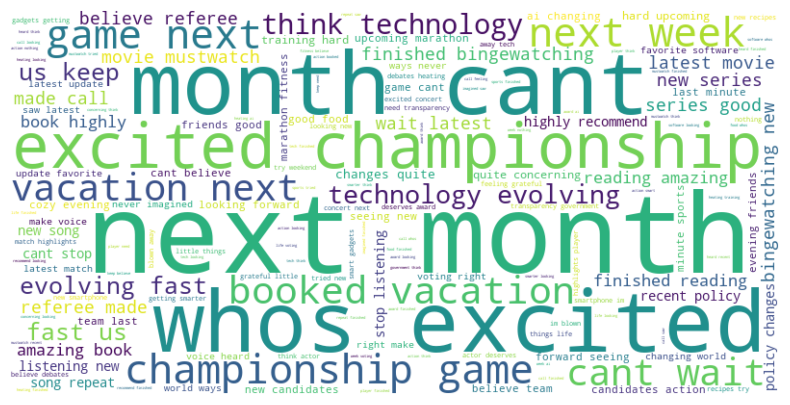

In [19]:
import pandas as pd
tweets_df = pd.read_csv('twitter.csv')
print(tweets_df.head())
import wordcloud
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import string

# Download NLTK resources
nltk.download('punkt')
nltk.download('stopwords')

# Preprocess the tweets
def preprocess_tweet(tweet):
    tweet = tweet.lower()
    tweet = tweet.translate(str.maketrans('', '', string.punctuation))
    tokens = word_tokenize(tweet)
    tokens = [word for word in tokens if word not in stopwords.words('english')]
    return ' '.join(tokens)

# Apply preprocessing
tweets_df['processed_tweet'] = tweets_df['tweet'].apply(preprocess_tweet)
import matplotlib.pyplot as plt
from wordcloud import WordCloud

# Create a word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(tweets_df['processed_tweet']))

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()